# Homework 2: Polynomial Regression, Normal Equation, Overfitting

#### Created by Xi Peng, Mar 2022

## 1. Introduction

In this homework you will answer questions to help you fully understand linear regression (Sec 2). You will also implement polynomial regression from scratch (Sec 3), compare the solution between gradient descent and normal equation, and get an idea of model complexity and overfitting (Sec 4).  

### What do you need to do?
#### a) Follow this Jupyter Notebook File (hw2.ipynb) LINE by LINE;
#### b) Implement your codes in the required functions;
#### c) Answer all the questions and paste all required figures.

### What do you need to submit?
#### a) "hw2.ipynb" (runable with your codes and answers)
#### b) "./figure/" (contains the figures).

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 2 Questions and Answers (30%)

Answer following questions. For mathmetical inputs, if you are not familiar with Latex, you can write the proof on paper, scan, and paste the copies right after the questions.



### 2.1 Dimension

Suppose we have $m=55$ training examples with $n=9$ features (excluding $x_0$). Let $x$ and $y$ denote the feature and label of one data example, $X$ and $Y$ denote the features and labels of all data examples, and $\Theta$ denote the parameters of the regression model. What is the dimension (put for example $15\times20$) of following variable:

a) $X$ is:

b) $Y$ is:

c) $\Theta$ is:

d) ${(X^TX)}^{-1}$ is:


### 2.2 Learning rate

Suppose we tried four different learning rates for gradient descent and observed four different cost-iteration curves. Given the learning rate, which curve (A, B, C, or D) most likely it would belong to? 

![learning-rate](figure/learning_rate.png)

a) Learning rate = 0.0005 is corresponding to curve:

b) Learning rate = 1.3 is corresponding to curve:

c) Learning rate = 0.01 is corresponding to curve:

d) Learning rate = 0.5 is corresponding to curve:


### 2.3 Gradient descent

Suppose we are using gradient descent to learn linear regression. The hypothesis is $h_{\theta}(x)=\theta_0+\theta_1x$. The initial values are $\theta_0=1$,$\theta_1=2$, and the learning rate is $0.5$. Suppose we have one data exmaple $(10,5)$ and use only this data example to update the model:

a) After the first step update, what is $\theta_0$ and $\theta_1$, respectively?

b) After the second step update, what is $\theta_0$ and $\theta_1$, respectively? 


### 2.4 Normal equation

Suppose you have a dataset with $m=1000$ examples and $n=200000$ features for each example. You want to use multivariate linear regression to fit the parameters $\theta$ to our data. Should you prefer gradient descent or the normal equation and WHY?


### 2.5 Feature Scaling

True or False?

a) Feature scaling speeds up gradient descent by making it require fewer iterations to get to a good solution.

b) Feature scaling prevents the matrix $\mathbf{X}^T\mathbf{X}$ (used in the normal equation) from being non-invertable (singular/degenerate).

c) Feature scaling is necessary to prevent the normal equation from getting stuck in local optima.

d) Feature scaling speeds up gradient descent by making each iteration of gradient descent less expensive to compute.


### 2.6 Traning and Test Plot

Given the training-test plot below ($M$ denotes the degress of Polynomial), answer the following questions
<div>
<img src="figure/train-test.png" width="500"/>
</div>

a) How many models have been trained and tested?

b) Which model(s) have the over-fitting issue? Which model(s) have the under-fitting issue?

c) Suppose a trained model has $\theta_3 = 19343$, what is the most likely value for $M$?


### Normal equation (Not required, Optional 5%)

Given the definition of maximimum likelihood estimation (MLE): $$\hat{\theta}_{MLE} = argmin \sum_{i=1}^{m} (h_\theta(\mathbf{x}_i) - y_i)^2$$, where $h_\theta(\mathbf{x}_i) = \theta^T \mathbf{x}_i$. Prove that the solution of MLE is $\hat{\theta}_{MLE}=(X^TX)^{-1}X^TY$. And in which case, the solution can be simplified as $\hat{\theta}_{MLE}=X^{-1}Y$?

[Paste your proof and solution here]


### Maximimum likelihood estimation (Not required, Optional 5%)

Given which assumption that maximimum likelihood estimation (MLE) is equivalent to the least squares regression model we have introduced in the class? Briefly prove that.

[Paste your proof and solution here]

 


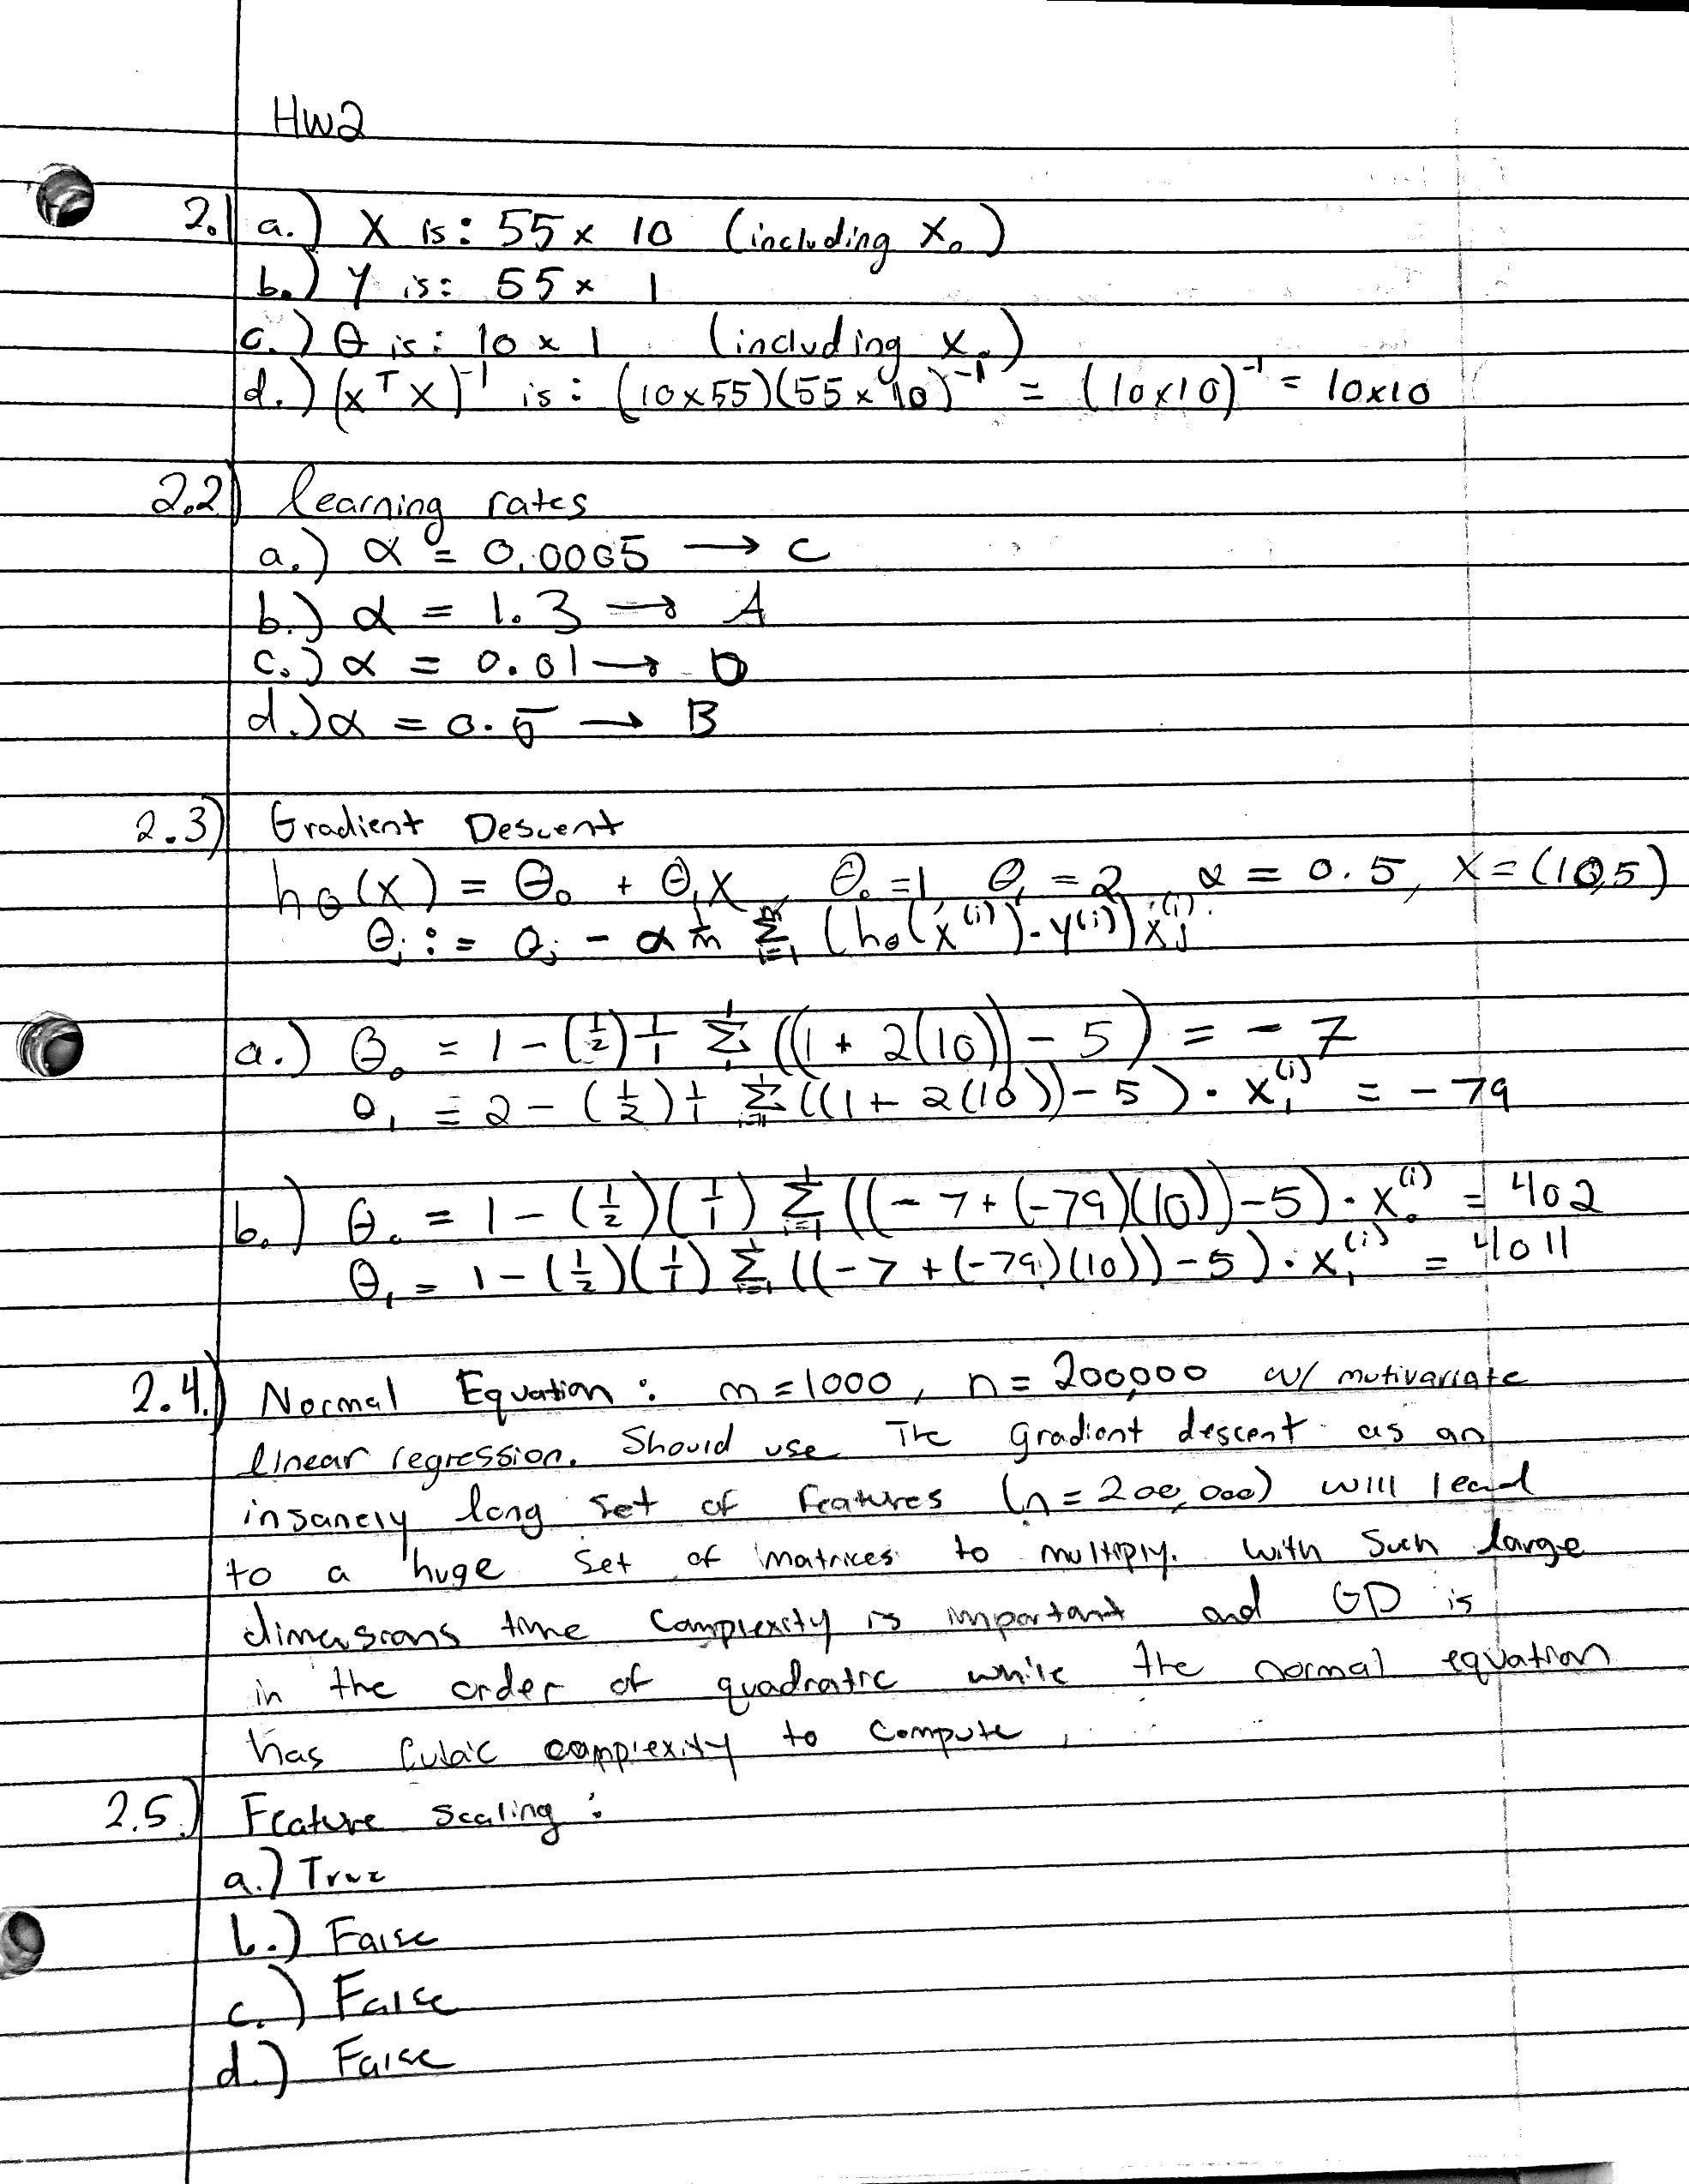

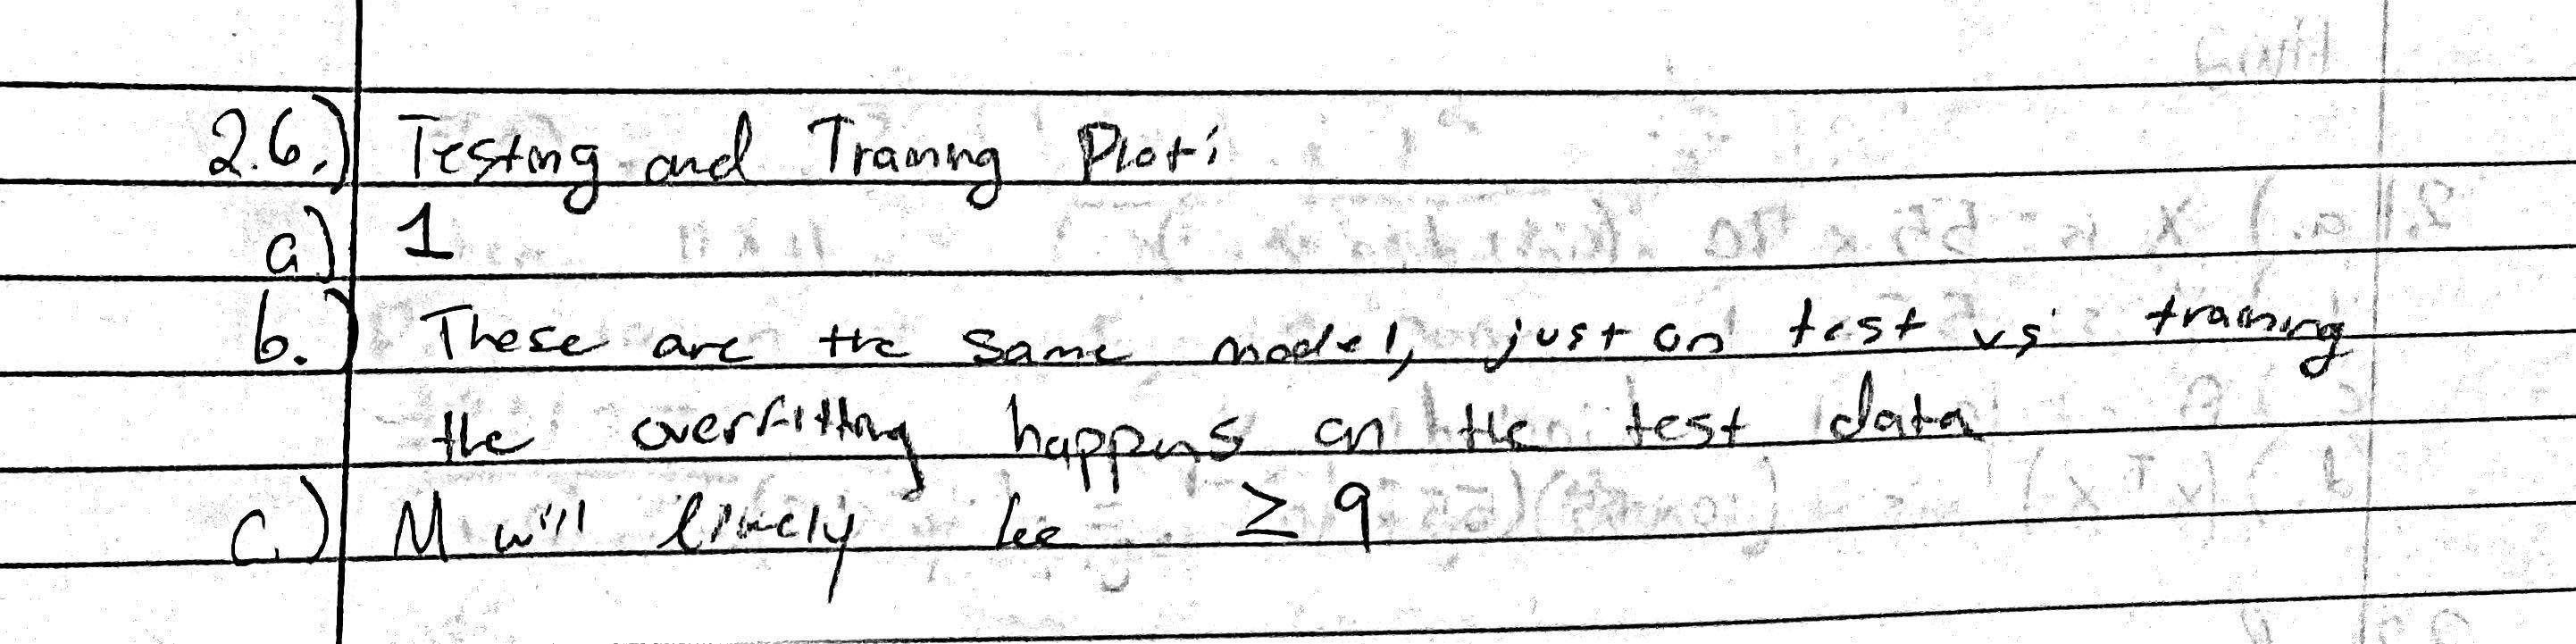

Text(0.5, 0, 'x')

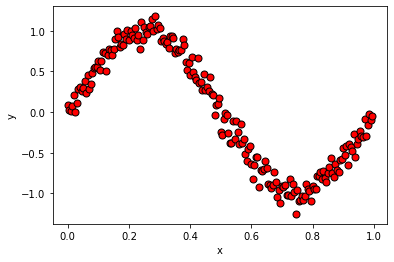

In [2]:
# Create training dataset
m = 200
mu = 0
sigma = 0.1
X_data = np.array([(i)/(m) for i in range(m)])

# [CHECKPOINT 1][5 points]
# Calculate Y
# Plot the dataset
# ======================= YOUR CODE HERE ===========================
y = np.sin(2 * np.pi * X_data) + np.random.normal(mu, sigma, m)

fig = plt.figure()  # open a new figure
plt.plot(X_data, y, 'ro', mec='k', ms=7)
plt.ylabel('y')
plt.xlabel('x')

# ==================================================================

### 3.2 Normal equation

We have learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

Hint: Before implement normal_equation function, following example shows how to convert array data to a matrix with a shape of $m \times 1$, and generate polynomial features matrix $[1, X, X^2, X^3, \cdots]$. 

In [3]:
# Here is an example 
# convert X to a column matrix of 5 x 1
# generate polynomial [1 X X^2 X^3]
# Use this hint to implement normal_equation()
X_col = X_data[:5].reshape(5,1)
X_poly = np.power(X_col, np.arange(4))
print(X_col)
print(X_poly)

[[0.   ]
 [0.005]
 [0.01 ]
 [0.015]
 [0.02 ]]
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 5.000e-03 2.500e-05 1.250e-07]
 [1.000e+00 1.000e-02 1.000e-04 1.000e-06]
 [1.000e+00 1.500e-02 2.250e-04 3.375e-06]
 [1.000e+00 2.000e-02 4.000e-04 8.000e-06]]


Complete the code for `normal_equation()` below which uses normal equation to estimate $\theta$ based on $X$ and $Y$. 

In [4]:
# [CHECKPOINT 2][10 points]
def normal_equation(X, Y, n):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, ).
    
    Y : array_like
        The value at each data point. A vector of shape (m, ).
        
    n : the order of polynomial regression model
        Remember the number of features will be n+1.
    
    Returns
    -------
    theta : array_like
        Estimated polynomial regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    #print("Normal equation start")
    #print("n: ", n)
    m = X.size
    #print("m: ", m)
    theta = np.zeros(n+1)
    #print("theta: ", theta)
    
    # ===================== YOUR CODE HERE ============================
    X_col = X[:m].reshape(m,1)
    #print("X_col: \n", X_col)
    X_poly = np.power(X_col, np.arange(n+1))
    #print("X poly powered: \n", X_poly)
    #ones = np.ones(m).reshape(m, 1)
    #X_poly = np.append(ones, X_poly, axis = 1)
    #print("X poly ones appended: \n", X_poly)
    #transposing
    X_t = np.transpose(X_poly)
    #print("X_poly transpose: \n", X_t)
    #finding dot product
    X_poly = X_t.dot(X_poly)
    #print("Multiplied by transpose: \n", X_poly)
    #taking inverse
    X_poly = np.linalg.pinv(X_poly)
    #print("inverse: \n", X_poly)
    #dot product with transpose again
    X_poly = X_poly.dot(X_t)
    #print("X poly by transpose: \n", X_poly)
    #print("X shape: ", X_poly.shape, "Y shape: ", Y.shape)
    X_poly = X_poly.dot(Y)
    #print("X poly by y: \n", X_poly)
    
    theta = X_poly
    #print("theta flattened: ", theta.flatten())
    
    
    # =================================================================
    return theta.flatten()

In [5]:
#normal_equation(X_data, y, 1)
theta = normal_equation(X_data, y, 3)
print("theta x set: ", theta)

theta x set:  [ -0.2094163   11.97180574 -34.60279135  23.04876756]


Complete the code for `polynomial_deploy()` below which uses estimated $\theta$ to predict $Y$ given $X$. 

In [6]:
# [CHECKPOINT 3][5 points]
def polynomial_deploy(X, theta):
    """
    Computes the polynomial regression prediction for data X.
    
    Parameters
    ----------
    X : array_like
        The input data. A vector of shape (m, ).
    
    theta : array_like
        Polynomial regression parameters. A vector of shape (n+1, ).
    
    Returns
    -------
    Y : array_like
        Polynomial prediction. A vector of shape (m, ).
    
    """
    #print("Begin polynomial deploy")
    m = X.size
    n = theta.size - 1
    Y = np.array([])
    
    # ===================== YOUR CODE HERE ============================
    #print("theta: ", theta)
    
    #print("X size", X.shape)
    X_col = X_data[:m].reshape(m,1)
    
    for i in range(m): #for each data point
        prediction = 0
        for j in range(n+1): #for each degree
            prediction += (theta[j] * X[i] ** j) 
            #print("theta: ", theta[j], "X val: ", X[i])
        #print("prediction for X: ", X[i], " is: ", prediction)
        Y = np.append(Y, prediction)
            
    #print("X poly size: ", X_poly.shape)
    
    # ===================== YOUR CODE HERE ============================
    
    return Y.flatten()
    
    

In [7]:
#MSE helper func
def MSE_func(m, hypothesis, actual):
    MSE = 0
    for i in range(m):
            MSE += (hypothesis[i] - actual[i]) ** 2
    return MSE

theta x set:  [ 2.34657436e-02  4.67915946e+00  1.72961173e+01 -1.16720215e+02
  1.58364208e+02 -6.37083413e+01]
plot complete


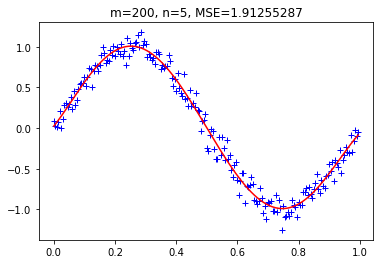

In [8]:
n = 5
theta = normal_equation(X_data, y, n)
print("theta x set: ", theta)
prediction = polynomial_deploy(X_data, theta)
MSE = MSE_func(X_data.size, prediction, y)
plt.figure()
plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
plt.plot(X_data, y, 'b+')
Y_predict = polynomial_deploy(X_data, theta)
plt.plot(X_data, Y_predict, 'r-')
print("plot complete")

theta x set:  [ 9.89359705e-11  1.00000000e+00  1.21517019e-10 -2.76543233e-11
  2.37948550e-12]
plot complete


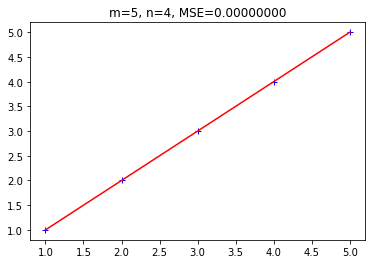

In [9]:
m = 5
n = 4
#subset_index = np.random.randint(0, X_data.size, m)

X_subset = np.array([1, 2, 3, 4, 5])#X_data[subset_index].reshape(m, 1)
Y_subset = np.array([1,2,3,4,5])#y[subset_index]

theta = normal_equation(X_subset, Y_subset, n)
print("theta x set: ", theta)
prediction = polynomial_deploy(X_subset, theta)
MSE = MSE_func(m, prediction, Y_subset)
plt.figure()
plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
plt.plot(X_subset, Y_subset, 'b+')
plt.plot(X_subset, prediction, 'r-')
print("plot complete")

### 3.3 Polynomial fitting

Now repeat the polynomial fitting experiment by selecting a random subset of the dataset to train the model. The training set size is selected as: $m=\{10, 50, 100, 200\}$. The order of polynomials is selected as: $n=\{0,1,2,3,9\}$. So totally you will train $4\times5=20$ models.

For each model, report estimated model parameters, calculate the MSEs, and plot the regression model together with the data examples used for training.

m: 10  poly degree: 0
m: 10  poly degree: 1
m: 10  poly degree: 2
m: 10  poly degree: 3
m: 10  poly degree: 9
m: 50  poly degree: 0
m: 50  poly degree: 1
m: 50  poly degree: 2
m: 50  poly degree: 3
m: 50  poly degree: 9
m: 100  poly degree: 0
m: 100  poly degree: 1
m: 100  poly degree: 2
m: 100  poly degree: 3
m: 100  poly degree: 9
m: 200  poly degree: 0
m: 200  poly degree: 1
m: 200  poly degree: 2
m: 200  poly degree: 3
m: 200  poly degree: 9


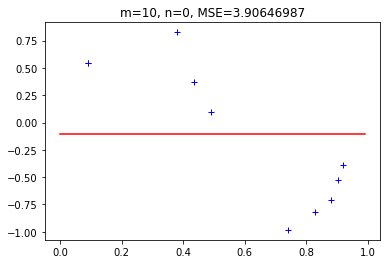

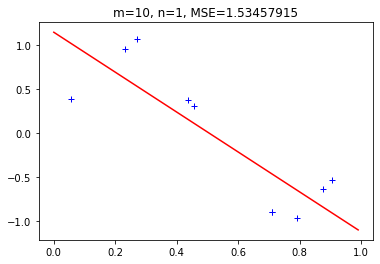

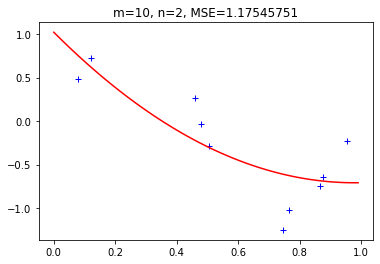

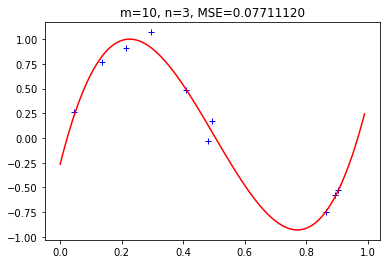

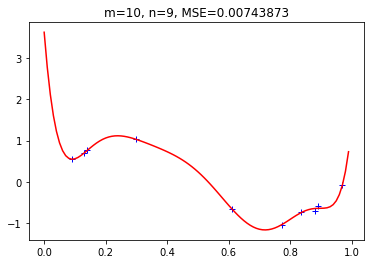

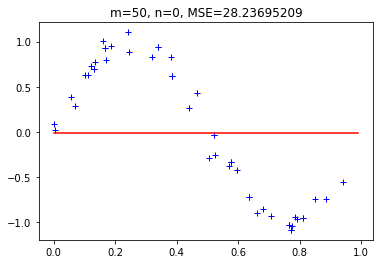

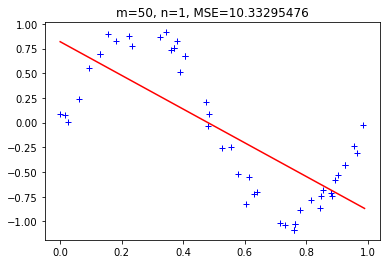

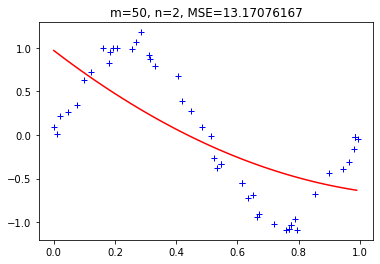

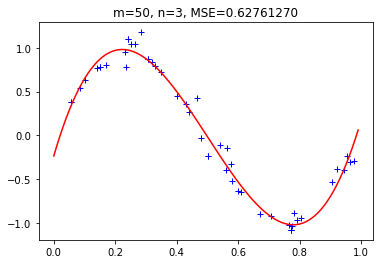

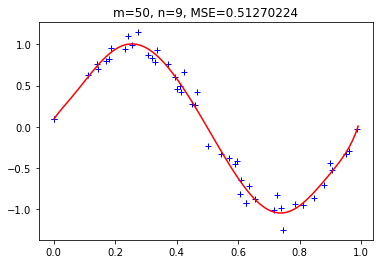

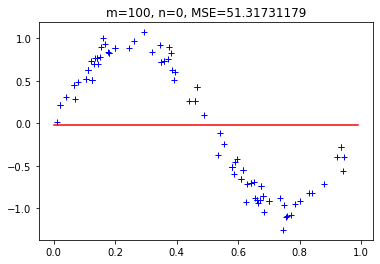

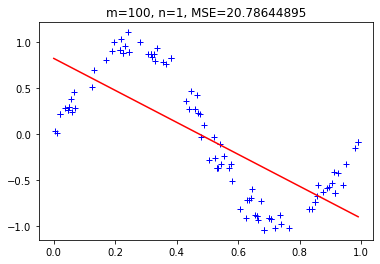

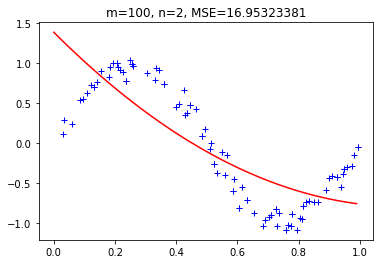

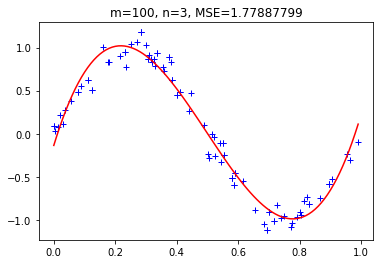

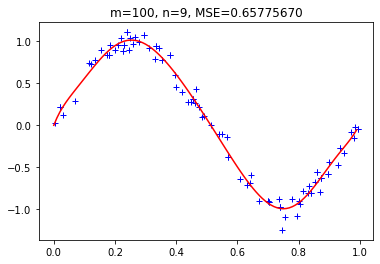

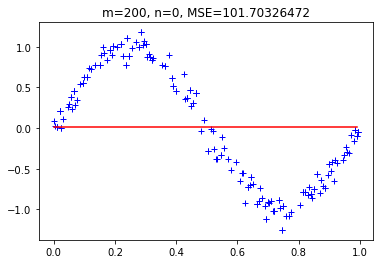

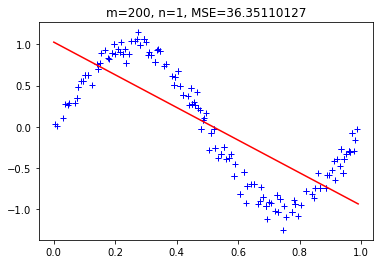

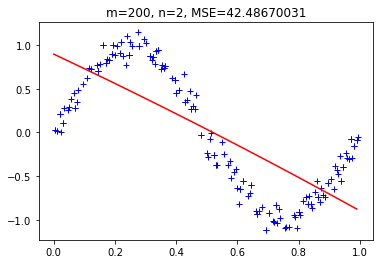

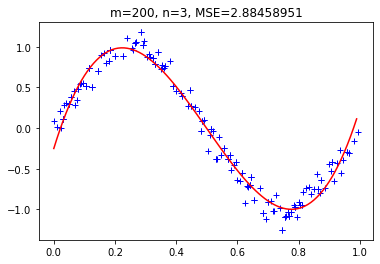

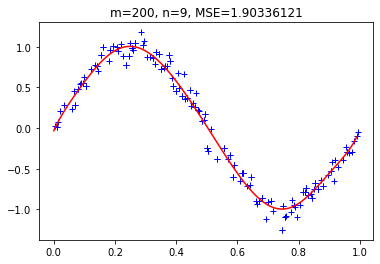

In [10]:
# [CHECKPOINT 4][5 points]
# You mush use loop to traverse the combinations of m and n
#
# Hint for debug:
# A quick way to check if your implementation is correct is to use 'np.polyfit'
# e.g. theta2 = np.polyfit(X_data, Y_data, n)
# Check if 'theta' estimated by normal_equation() is the same as 'theta2' 
#
for m in [10, 50, 100, 200]:
    for n in [0, 1, 2, 3, 9]:
        print("m:", m, " poly degree:", n)
        #print("M: ", m, "N: ", n)
        subset_index = np.random.randint(0, X_data.size, m)
        
        X_subset = X_data[subset_index].reshape(m, 1)
        Y_subset = y[subset_index]
        
        # ===================== YOUR CODE HERE ============================
        theta = normal_equation(X_subset, Y_subset, n)
        Y_predict = polynomial_deploy(X_subset, theta)
    
        '''for i in range(m-1):
            MSE += (Y_predict[i] - Y_subset[i]) ** 2'''
        
        MSE = MSE_func(m, Y_predict, Y_subset) #m hypothesis actual
        
        # plot the polynomial curve
        plt.figure()
        plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
        plt.plot(X_subset, Y_subset, 'b+')
        X_plot = np.arange(0,1,0.01)
        Y_plot = polynomial_deploy(X_plot, theta)
        plt.plot(X_plot, Y_plot, 'r-')
        #print("plot complete")
        # =================================================================



### 3.4 Discussion

Based on the experimental results, talk about your observations. 

[CHECKPOINT 5][5 points]

======================= YOUR DISCUSSION HERE ==========================

Try to talk about following aspects:
1. Given fixed m, when n increase, how about underfitting/overfitting and fitting error?  

In general, it seems as n increases the fit gets better and the MSE goes down. However sometimes when the data models an odd or even polynomial, and the n is the opposite of either the odd or the even. This can actually lead to an increase in cost as n increases to the next odd / even

2. Given fixed n, when m increase, how about underfitting/overfitting and fitting error?

Given the same n, and an increase in m the error generally seems to increase in small incrememnts.

3. Which model has the best performance? And why?

Overall, the n = 9 had the best performance as this as an odd polynomial degree that was able to fit the 3rd degree polynomial data quite well and make adjustments to fit the data at maximum efficiency.

4. Your conclusion.

If looking for accuracy, try to keep the degree either odd or even depending on what the data may model. The best solution is to do a higher degree of the same odd or even

====================================================================

## 4 Regularization (30%)

Following Sec. 3, you will implement the regularization and perform abation study to better understand underfitting, overfitting, and regularization. 

### 4.1 Regularized polynomial regression

Complete the codes to implement the function `normal_equation_reg()` below.

In [11]:
# [CHECKPOINT 6][10 points]
def normal_equation_reg(X, Y, n, lambd):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, ).
    
    Y : array_like
        The value at each data point. A vector of shape (m, ).
        
    n : the order of polynomial regression model
        Remember the number of features will be n+1.
        
    lambd: the weight to ballance fitting error and regularization loss
    
    Returns
    -------
    theta : array_like
        Estimated polynomial regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(n+1)
    
    m = X.size
    
    #print('normal equation x size:', m)
    
    # ===================== YOUR CODE HERE ============================
    X_col = X[:m].reshape(m,1)
    #print("X_col: \n", X_col)
    X_poly = np.power(X_col, np.arange(n+1))
    #print("X poly powered: \n", X_poly)
    #transposing
    X_t = np.transpose(X_poly)
    #print("X_poly transpose: \n", X_t)
    #finding dot product
    X_poly = X_t.dot(X_poly)
    #print("Multiplied by transpose: \n", X_poly)
    #to regularize, me must have X * Xt add lambda * L matrix where L is size n+1
    L = np.identity(n+1)
    L[0] = np.zeros(n+1)
    L[:, 0] = np.zeros(n+1)
    #print("L matrix\n", L)
    X_poly = np.add(X_poly, np.dot(lambd, L))
    #taking inverse
    X_poly = np.linalg.pinv(X_poly)
    #print("inverse: \n", X_poly)
    #dot product with transpose again
    X_poly = X_poly.dot(X_t)
    #print("X poly by transpose: \n", X_poly)
    #print("X shape: ", X_poly.shape, "Y shape: ", Y.shape)
    X_poly = X_poly.dot(Y)
    #print("X poly by y: \n", X_poly)
    
    theta = X_poly
    #print("theta flattened: ", theta.flatten())
    
    
    # =================================================================
    return theta.flatten()

plot complete


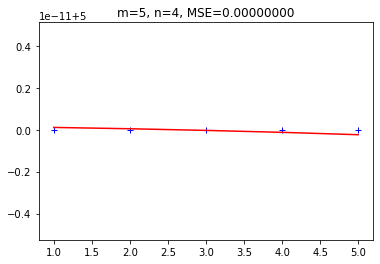

In [12]:
#regularization testing


n = 4
lambd = 5 # regularization gets this much closer to the line and prevents overfitting and underfitting
X_subset = np.array([1, 2, 3, 4, 5])#X_data[subset_index].reshape(m, 1)
Y_subset = np.array([5, 5, 5, 5, 5])#y[subset_index]
m = X_subset.size
theta = normal_equation_reg(X_subset, Y_subset, n, lambd)
prediction = polynomial_deploy(X_subset, theta)
MSE = MSE_func(m, prediction, Y_subset)
plt.figure()
plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
plt.plot(X_subset, Y_subset, 'b+')
plt.plot(X_subset, prediction, 'r-')
print("plot complete")

### 4.2 Create testing dataset

Create a testing dataset contains 199 uniformly spaced data points: $$x_{i,test} = x_{i,train} + \frac{1}{2 \times (m-1)}, i = 1, \cdots, m-1, y_{i,test} = f(x_{i,test})$$.
Once generate the dataset, you need to plot it out.

Text(0.5, 0, 'x')

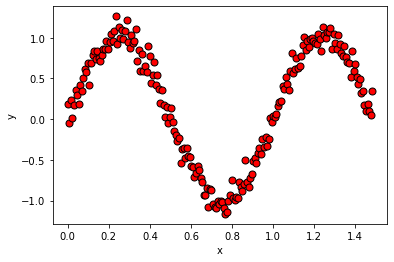

In [13]:
# [CHECKPOINT 7][5 points]
# Create the testing dataset
# Plot the dataset
# ======================= YOUR CODE HERE ===========================
# Create training dataset
m = 199
mu = 0
sigma = 0.1
training_dataset = np.array([(X_data[i] + (i)/(2*(m-1))) for i in range(m-1)])

#print('training dataset:\n', training_dataset)

# [CHECKPOINT 1][5 points]
# Calculate Y
# Plot the dataset
y_dataset = np.sin(2 * np.pi * training_dataset) + np.random.normal(mu, sigma, m-1)

fig = plt.figure()  # open a new figure
plt.plot(training_dataset, y_dataset, 'ro', mec='k', ms=7)
plt.ylabel('y')
plt.xlabel('x')

# ==================================================================

### 4.3 Polynomial fitting

Similar to Sec 3.3, we try

The training set size is selected as: $m=\{10, 50\}$. The order of polynomials is selected as: $n=\{3, 9\}$. Try different values of $lambda$ for each model, such as $ln\lambda = {-\infty, -18, 0}$, and pick out the best value.

For each model, report estimated model parameters, calculate the MSEs on training and testing data respectively, and plot the regression model together with the training and testing data. Use different color to distinguish training and testing data.

Note: The testing set has a fixed number (199) of data points. No matter how many training data points are used to train the model, all the testing data points will be tested.

m: 10  poly degree: 3
m: 10  poly degree: 3
m: 10  poly degree: 3
m: 10  poly degree: 9
m: 10  poly degree: 9
m: 10  poly degree: 9
m: 50  poly degree: 3
m: 50  poly degree: 3
m: 50  poly degree: 3
m: 50  poly degree: 9
m: 50  poly degree: 9
m: 50  poly degree: 9


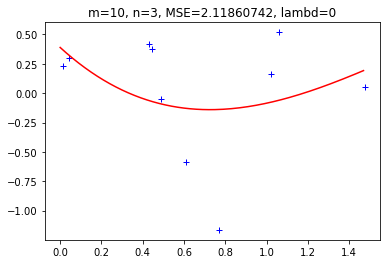

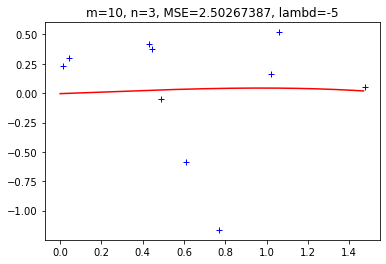

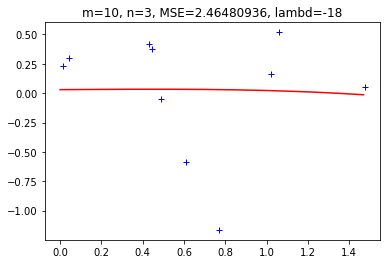

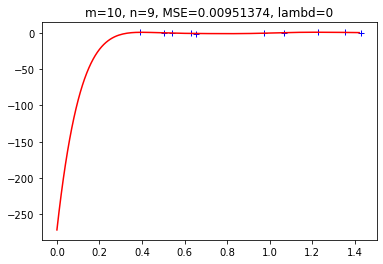

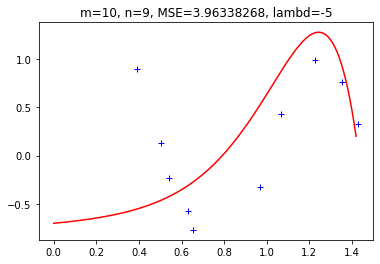

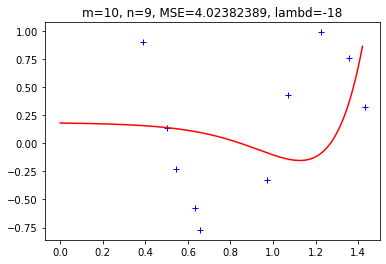

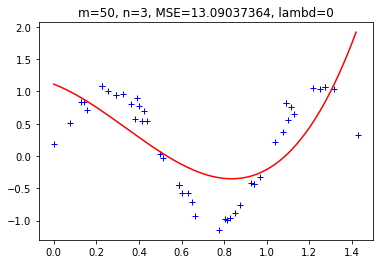

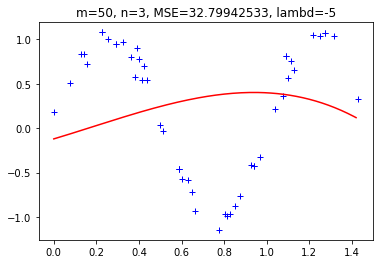

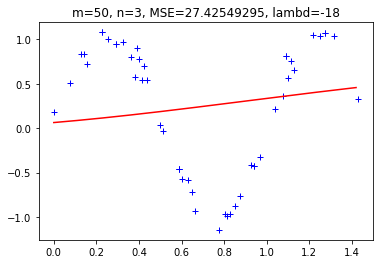

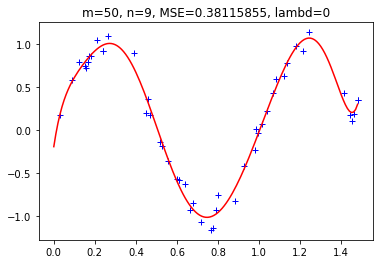

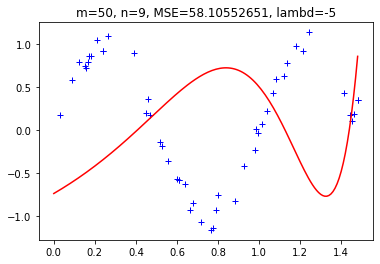

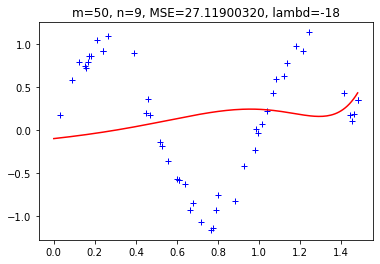

In [14]:
# [CHECKPOINT 8][10 points]
#
# ======================= YOUR CODE HERE ===========================
for m in [10, 50]:
    for n in [3, 9]:
        subset_index = np.random.randint(0, training_dataset.size, m)
        X_subset = training_dataset[subset_index].reshape(m, 1)
        Y_subset = y_dataset[subset_index]
        for lambd in [0, -5, -18]:
            print("m:", m, " poly degree:", n)
            
            
            #print('x size:', X_subset.size, 'y size:', Y_subset.size)

            # ===================== YOUR CODE HERE ============================
            #theta = normal_equation(X_subset, Y_subset, n)
            theta = normal_equation_reg(X_subset, Y_subset, n, lambd)
            Y_predict = polynomial_deploy(X_subset, theta)

            '''for i in range(m-1):
                MSE += (Y_predict[i] - Y_subset[i]) ** 2'''

            MSE = MSE_func(m, Y_predict, Y_subset) #m hypothesis actual

            # plot the polynomial curve
            plt.figure()
            plt.title('m=%d, n=%d, MSE=%.8f, lambd=%d' % (m, n, MSE, lambd))
            plt.plot(X_subset, Y_subset, 'b+')
            X_plot = np.arange(0,np.amax(X_subset),0.01)
            Y_plot = polynomial_deploy(X_plot, theta)
            plt.plot(X_plot, Y_plot, 'r-')
            #print("plot complete")
            # =================================================================




# ==================================================================

### 4.4 Discussion

Based on the experimental results, talk about your observations. 

[CHECKPOINT 9][5 points]

======================= YOUR DISCUSSION HERE ==========================

Try to talk about following aspects:
1. How the lambda affect the learned model. 
The 0 lambda value means no regularization, these were the same models as beforehand. With regularization (i.e. lambd -18) the line was far straighter. This was in effort to reduce overfitting, With high degree models like 9 this is very useful as unregularized models can have a much higher MSE. 
2. Compare the results of Sec 3.3 and Sec 4.3 that share the same setups.
Much higher MSE's for high degree data with low data points without regularization compared to those with regularization.
3. Your conclusion.
Regularization becomes extremely useful with low m values, and high n values (when overfitting happens the most)

========================================================================